In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from sklearn.manifold import TSNE

# 1. Importação e Leitura dos Dados

In [3]:
df = pd.read_csv('clusterization.csv')

# 2. Análise das Features

In [4]:
# Análise da base a partir dos 5 primeiros registros
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9
0,1.788532,1.514571,1.965787,1.788532,1.839011,0.027213,4.287439,1.103957,0.272501,0.390037
1,1.137568,-0.537787,0.405860,1.137568,1.177157,0.881743,2.289545,-0.427406,-0.227506,0.452705
2,0.861253,2.133148,-1.285062,0.861253,1.654487,0.104453,-0.858607,0.455393,-1.066773,-0.382173
3,1.630619,-0.000408,0.688288,1.630619,2.688988,2.321262,1.977060,0.234256,-1.424967,-0.864576
4,2.339800,-3.593987,-4.507650,2.339800,-3.642843,0.772287,2.938295,1.424821,-0.171201,4.652432


In [5]:
# Análise dos Valores das Features da base
df.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,0.742252,0.475308,1.836206,0.742252,1.725555,1.553581,1.272966,0.575115,0.938788,0.852863
std,1.528055,2.329950,2.644570,1.528055,1.837623,1.790017,1.537749,1.625011,1.376636,1.463754
min,-6.181360,-9.204687,-8.180204,-6.181360,-5.413946,-7.579985,-5.455328,-6.329266,-4.985370,-6.206228
25%,-0.281585,-1.116588,0.013903,-0.281585,0.473721,0.416780,0.294580,-0.414632,0.022146,-0.110357
50%,0.758129,0.282782,1.792516,0.758129,1.660058,1.549140,1.306885,0.666649,0.939787,0.871200
75%,1.791262,1.924617,3.592834,1.791262,2.919211,2.705694,2.282172,1.672459,1.860470,1.824929
max,6.389245,10.448874,12.617171,6.389245,9.729344,9.415774,7.171006,7.421327,7.266332,6.640401


In [6]:
# Análise dos Valores das Features da base
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
x0    15000 non-null float64
x1    15000 non-null float64
x2    15000 non-null float64
x3    15000 non-null float64
x4    15000 non-null float64
x5    15000 non-null float64
x6    15000 non-null float64
x7    15000 non-null float64
x8    15000 non-null float64
x9    15000 non-null float64
dtypes: float64(10)
memory usage: 1.1 MB


Como será utilizado um modelo baseado na distância euclidiana, é necessário verificar se os valor das features estão na mesma escala.

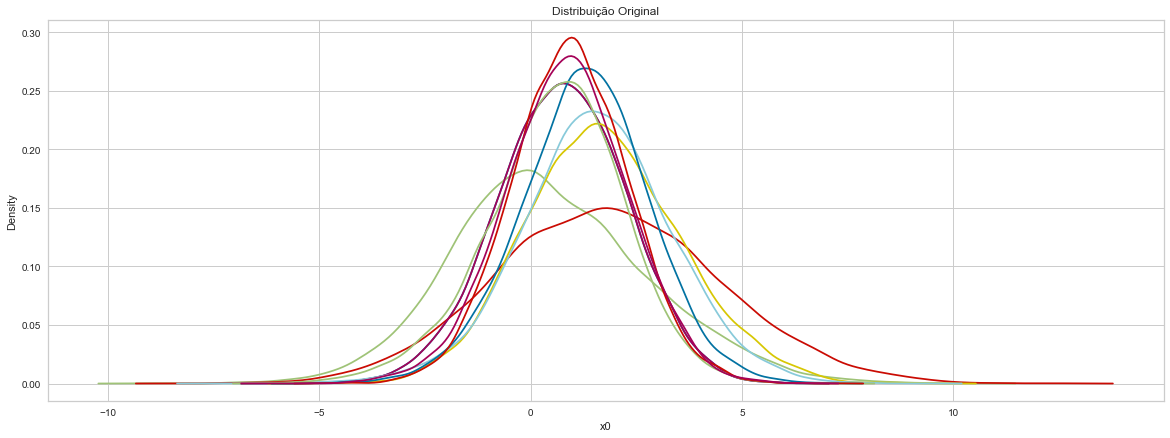

In [7]:
# Análise da Distribuição Original dos Valores da base
fig, (ax1) = plt.subplots(ncols=1, figsize=(20, 7))
ax1.set_title('Distribuição Original')

sns.kdeplot(df['x0'], ax=ax1)
sns.kdeplot(df['x1'], ax=ax1)
sns.kdeplot(df['x2'], ax=ax1)
sns.kdeplot(df['x3'], ax=ax1)
sns.kdeplot(df['x4'], ax=ax1)
sns.kdeplot(df['x5'], ax=ax1)
sns.kdeplot(df['x6'], ax=ax1)
sns.kdeplot(df['x7'], ax=ax1)
sns.kdeplot(df['x8'], ax=ax1)
sns.kdeplot(df['x9'], ax=ax1);

# 3. Transformação do dados

Como mostrado no acima, alguns valores não estão na mesma escala que os demais. Diante disso, será necessário normalizar os valores, de modo que os valores fiquem no mesmo intervalo do conjunto de treinamento, neste caso, entre zero e um. Para Isso, será utilizado o método MinMaxScaler da library sklearn. Abaixo é possível visualizar o processo.

In [8]:
# Transformação dos dados
mm_scaler = preprocessing.MinMaxScaler()
X = mm_scaler.fit_transform(df)
X = pd.DataFrame(X, columns=df.columns)

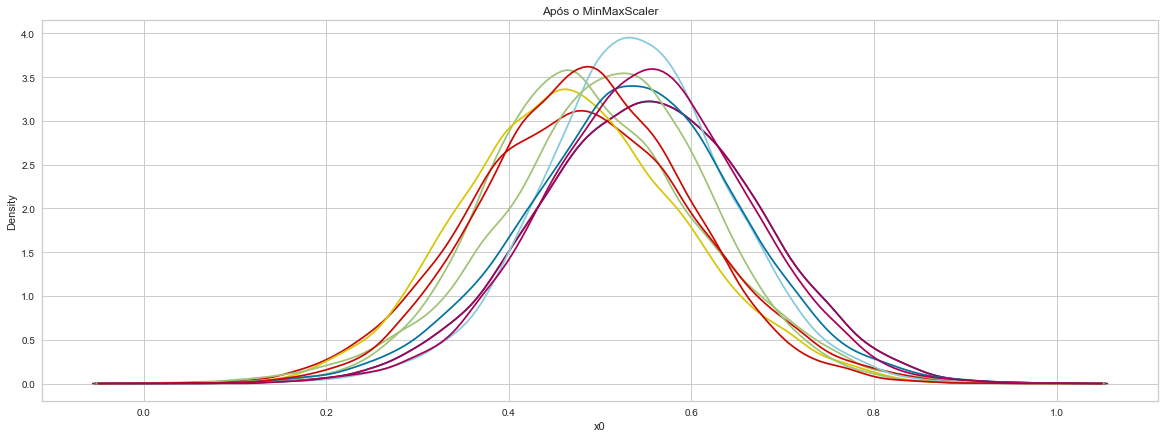

In [9]:
# Distribuição dos valores após a transformação
fig, (ax1) = plt.subplots(ncols=1, figsize=(20, 7))
ax1.set_title('Após o MinMaxScaler')

sns.kdeplot(X['x0'], ax=ax1)
sns.kdeplot(X['x1'], ax=ax1)
sns.kdeplot(X['x2'], ax=ax1)
sns.kdeplot(X['x3'], ax=ax1)
sns.kdeplot(X['x4'], ax=ax1)
sns.kdeplot(X['x5'], ax=ax1)
sns.kdeplot(X['x6'], ax=ax1)
sns.kdeplot(X['x7'], ax=ax1)
sns.kdeplot(X['x8'], ax=ax1)
sns.kdeplot(X['x9'], ax=ax1);

In [10]:
# Análise dos dados transformados
X.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,0.550778,0.492531,0.481619,0.550778,0.471463,0.537403,0.532878,0.502115,0.483538,0.549490
std,0.121558,0.118551,0.127159,0.121558,0.121349,0.105321,0.121789,0.118178,0.112363,0.113941
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.469331,0.411534,0.393997,0.469331,0.388797,0.470515,0.455390,0.430137,0.408720,0.474511
50%,0.552041,0.482735,0.479518,0.552041,0.467138,0.537141,0.535564,0.508772,0.483619,0.550917
75%,0.634227,0.566274,0.566083,0.634227,0.550287,0.605191,0.612807,0.581919,0.558766,0.625157
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 4. Clustering 

Nesta sessão, será utilizado o algoritmo KMeans, da library sklearn, para realizar o agrupamento. Serão utilizadas as seguintes métricas para avaliar no melhor número de clusters: elbow method, silhouette score, calinski-harabasz e davies-bouldin

## 4.1 Elbow method

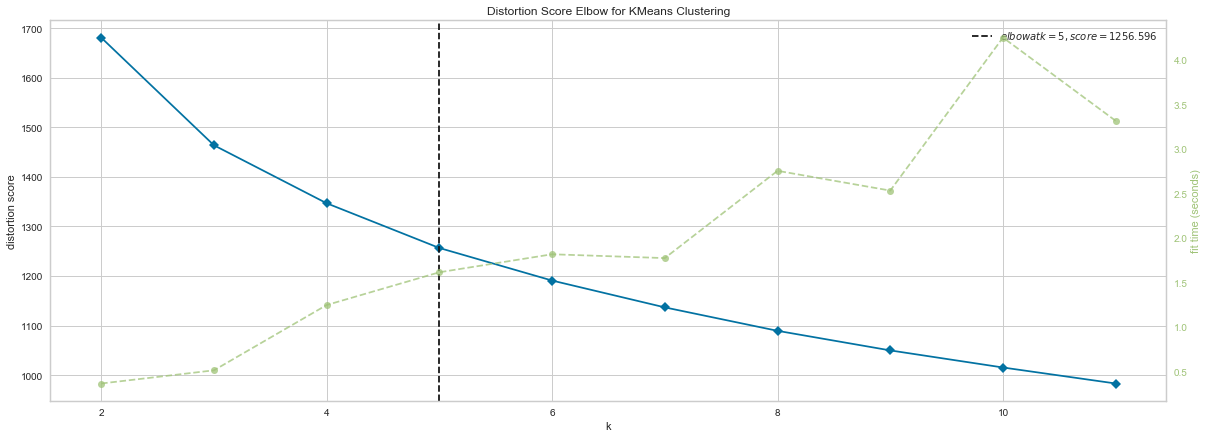

In [11]:
# Elbow method
model = KMeans(random_state=10)
visualizer = KElbowVisualizer(model, k=(2,12))

plt.figure(figsize=(20, 7))
visualizer.fit(X)
visualizer.show(); 

Para avalição do Elbow method, foi utilizado o método KElbowVisualizer, que indica o número ideal de clusters, ajustando o modelo com uma gama de valores para K. Se o gráfico de linha se assemelha a um braço, o “cotovelo” (o ponto de inflexão na curva) é uma boa indicação de que o modelo trabalhado se ajusta melhor a esse ponto. Inicialmente, a medida de erro (variação dentro do cluster) diminui com o aumento no número do cluster. Após um determinado ponto, k, a medida de erro começa a achatar. O número do cluster correspondente a esse ponto específico, k = 5, deve ser considerado como o número ideal de clusters.

## 4.2 Silhouette score

Para contribuir na análise, será executado o modelo TSNE de redução de dimensionalidade apenas para visualização dos dados. Esse modelo será útil para visualizar os grupos formados, através de um gráfico de dispersão.

In [12]:
# TSNE Redução de dimessionalidade para visualização
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

(15000, 2)

n_clusters = 2  | Média de silhouette_score é : 0.18178509328023812
n_clusters = 3  | Média de silhouette_score é : 0.16365660008043503
n_clusters = 4  | Média de silhouette_score é : 0.14666452802349247
n_clusters = 5  | Média de silhouette_score é : 0.13883725639044042
n_clusters = 6  | Média de silhouette_score é : 0.13215074937569843
n_clusters = 7  | Média de silhouette_score é : 0.12951135715547935
n_clusters = 8  | Média de silhouette_score é : 0.1335990680277306
n_clusters = 9  | Média de silhouette_score é : 0.12948029961860982
n_clusters = 10  | Média de silhouette_score é : 0.12637114498274055
n_clusters = 11  | Média de silhouette_score é : 0.12602568800312594


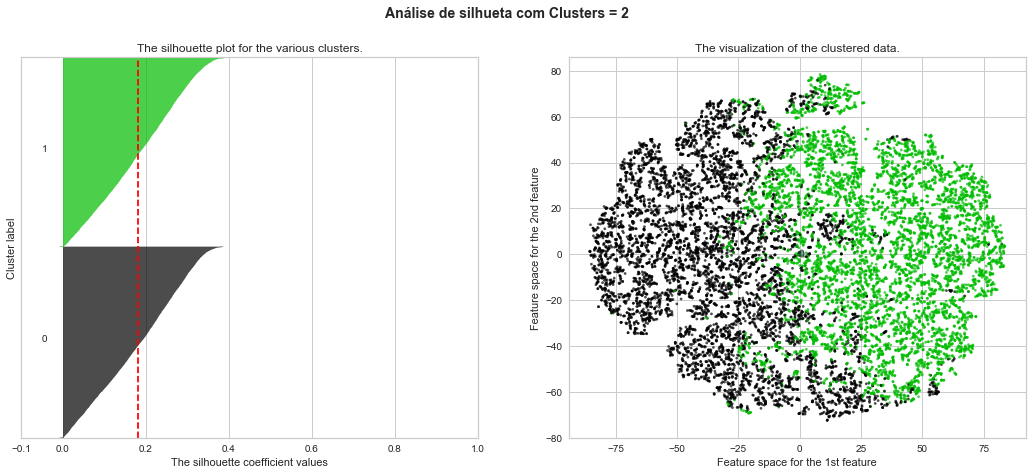

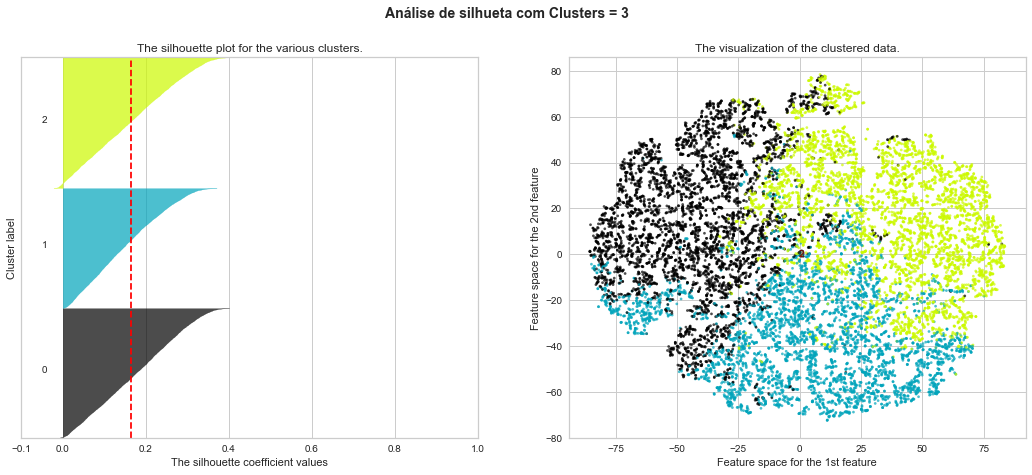

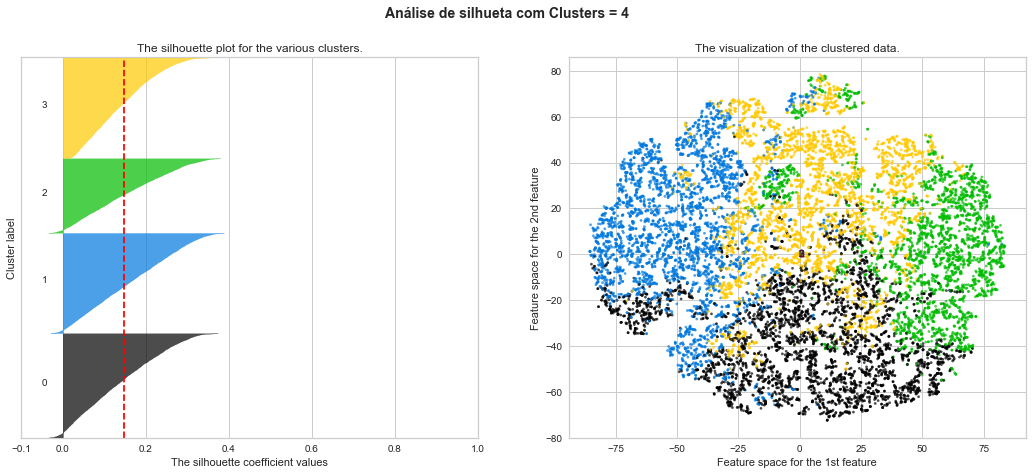

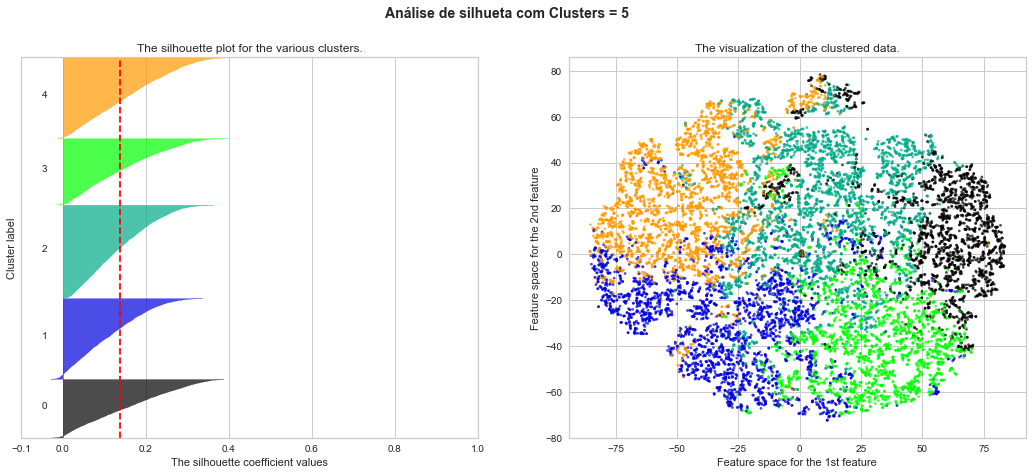

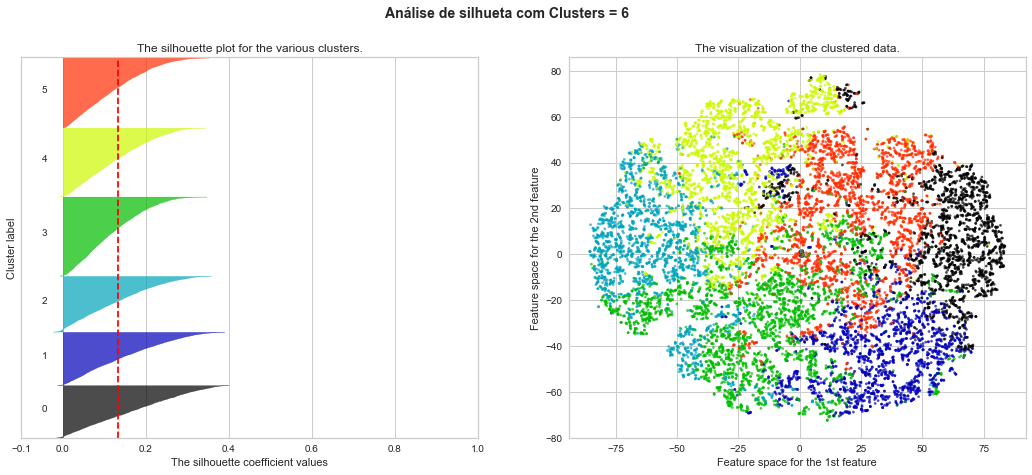

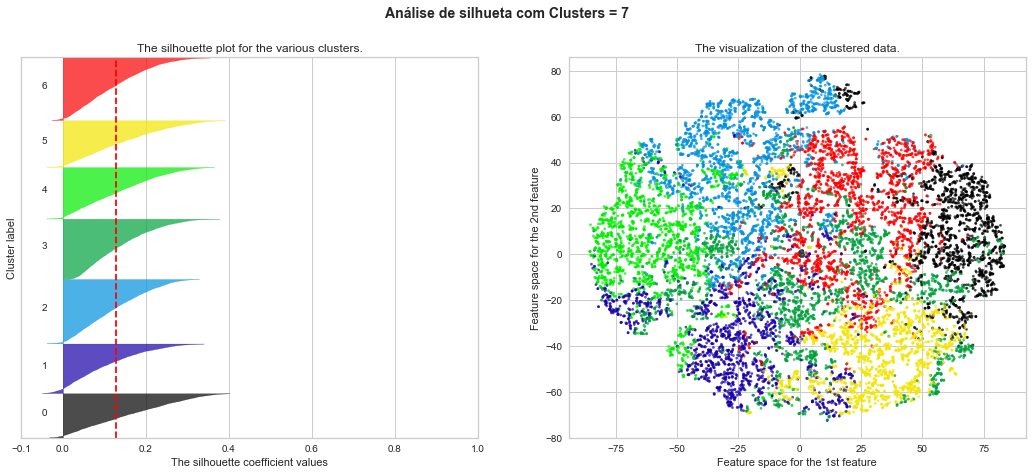

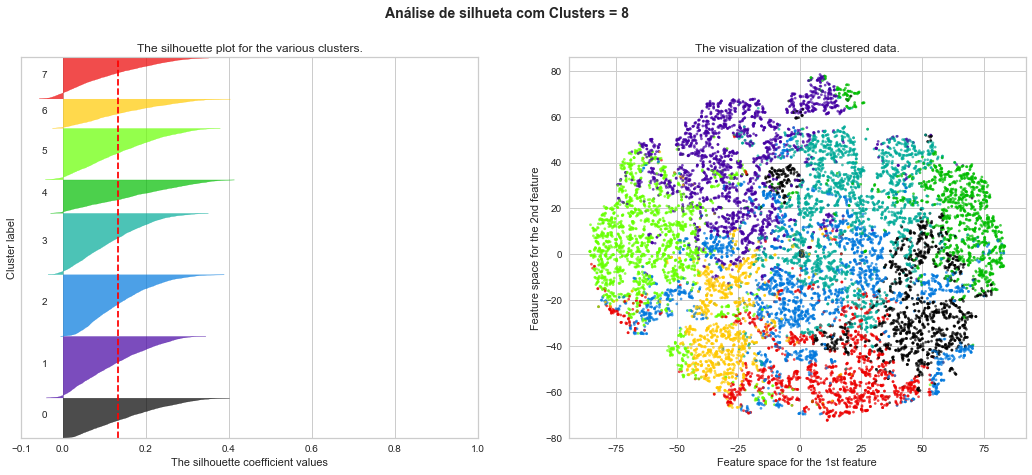

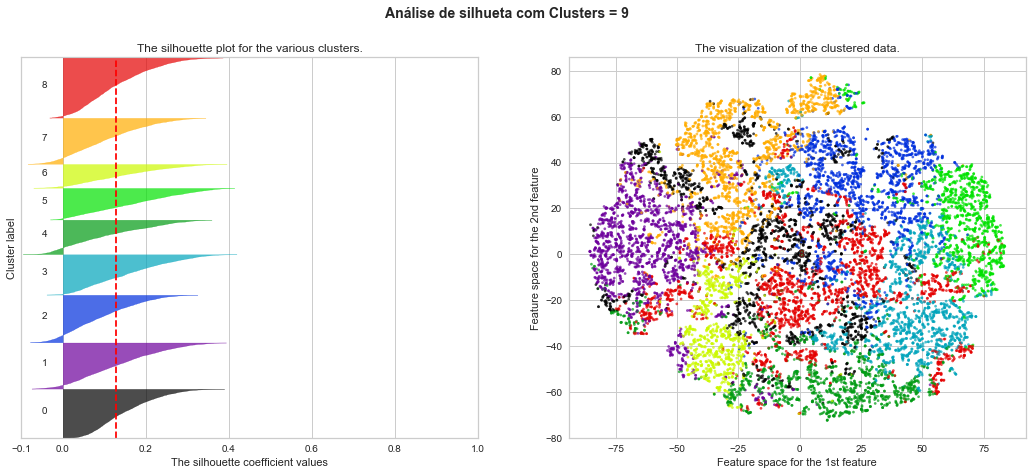

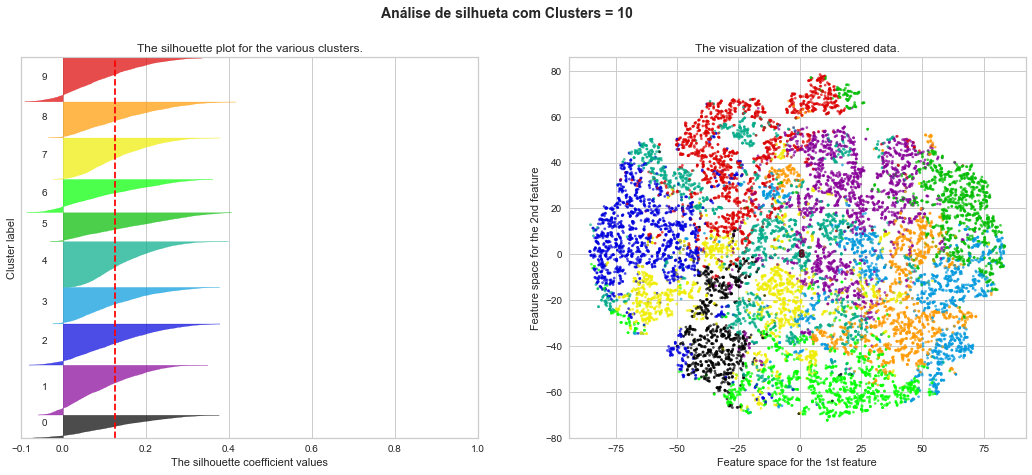

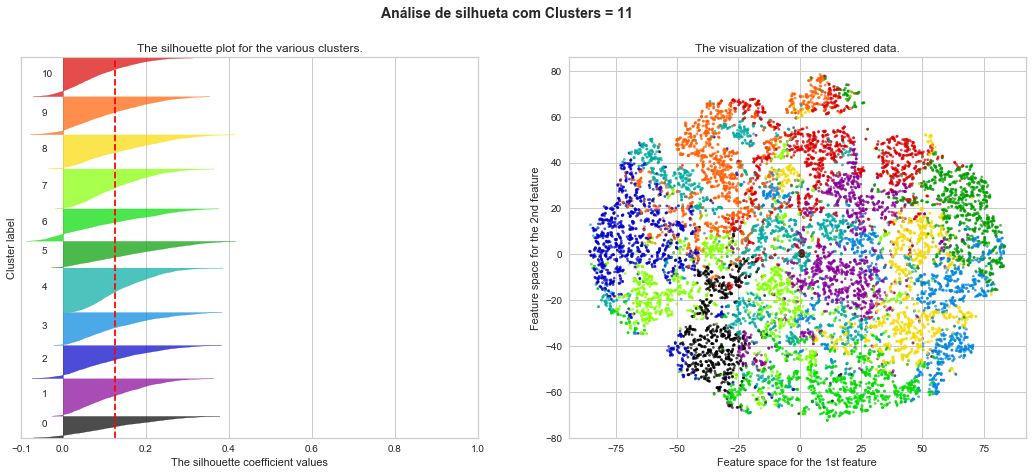

In [13]:
# Silhouette score
range_n_clusters = range(2,12)

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)    
    ax1.set_xlim([-0.1, 1])    
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    
    print('n_clusters =', n_clusters,' | Média de silhouette_score é :', silhouette_avg)

    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        y_lower = y_upper + 10 

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # Segundo Plot
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_embedded[:, 0], X_embedded[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Label
    centers = clusterer.cluster_centers_
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Análise de silhueta com Clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Através do Silhouette score e de suas representações gráficas, é possível visualizar que o número de clusters 5 apresenta uma boa distância entre os grupos, deixando os grupos bem definidos.

## 4.3 Davies Bouldin Score

In [14]:
range_n_clusters = range(2,12)
db={}

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters,random_state=10).fit(X)
    if n_clusters == 3: labels = kmeans.labels_
    clusters = kmeans.labels_
    db[n_clusters] = davies_bouldin_score(X,clusters)
    print('n_cluster: ' + str(n_clusters) + ' | davies bouldin score: ' + str(db[n_clusters]))

n_cluster: 2 | davies bouldin score: 1.892174639391149
n_cluster: 3 | davies bouldin score: 1.7638536354186038
n_cluster: 4 | davies bouldin score: 1.774859167293062
n_cluster: 5 | davies bouldin score: 1.7850770139301122
n_cluster: 6 | davies bouldin score: 1.7798002197648222
n_cluster: 7 | davies bouldin score: 1.7765204565931523
n_cluster: 8 | davies bouldin score: 1.6895551347808238
n_cluster: 9 | davies bouldin score: 1.6583121010423674
n_cluster: 10 | davies bouldin score: 1.6618614579873174
n_cluster: 11 | davies bouldin score: 1.6427710382031002


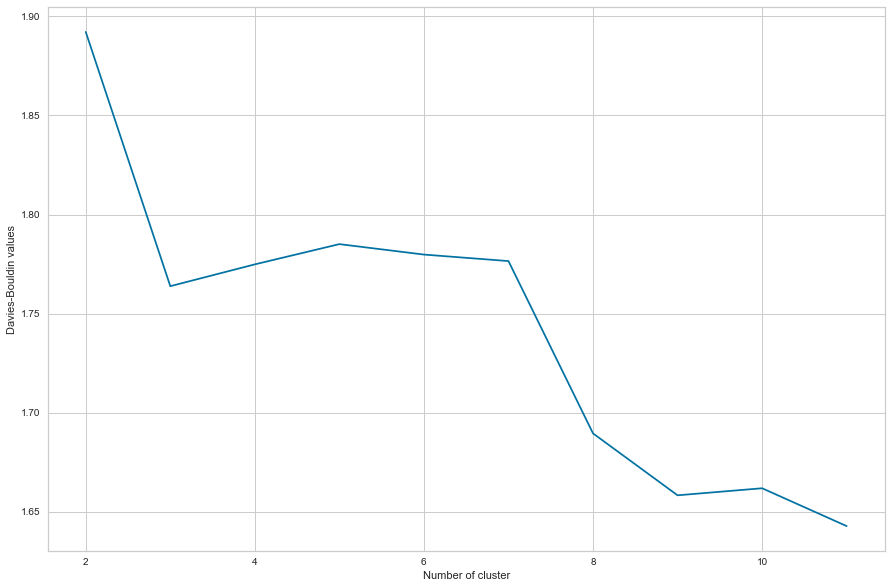

In [15]:
plt.figure(figsize=(15,10))
plt.plot(list(db.keys()), list(db.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Davies-Bouldin values")
plt.show()

## 4.4 Calinski Harabasz Score

In [16]:
range_n_clusters = range(2,12)
ch={}

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters,random_state=10).fit(X)
    if n_clusters == 5: labels = kmeans.labels_
    clusters = kmeans.labels_
    ch[n_clusters] = calinski_harabasz_score(X,clusters)
    print('n_cluster: ' + str(n_clusters) + ' | calinski harabasz score: ' + str(ch[n_clusters]))

n_cluster: 2 | calinski harabasz score: 3732.0083256631633
n_cluster: 3 | calinski harabasz score: 3256.4132486655267
n_cluster: 4 | calinski harabasz score: 2794.2532885028154
n_cluster: 5 | calinski harabasz score: 2515.7124316964637
n_cluster: 6 | calinski harabasz score: 2289.180365568417
n_cluster: 7 | calinski harabasz score: 2117.4844952151793
n_cluster: 8 | calinski harabasz score: 1986.871763018797
n_cluster: 9 | calinski harabasz score: 1874.4444019583877
n_cluster: 10 | calinski harabasz score: 1779.320997812445
n_cluster: 11 | calinski harabasz score: 1703.1918804734455


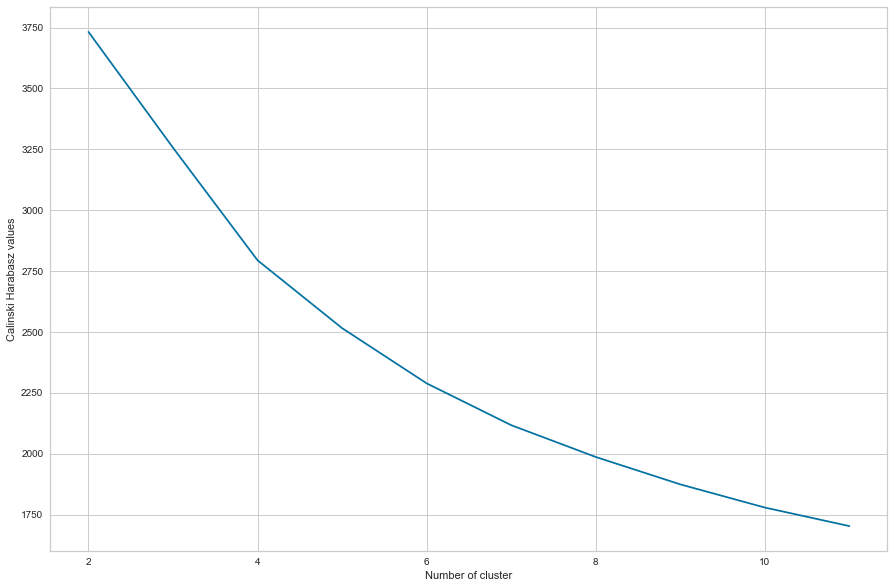

In [17]:
plt.figure(figsize=(15,10))
plt.plot(list(ch.keys()), list(ch.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Calinski Harabasz values")
plt.show()

# 5. Conclusão

Com análise das métricas, é possível visualizar que o número ideal de clusters, para este problema, é o valor 5, pois é K que menos apresenta variação dentro dos clusters(medida de erro) e que apresenta melhor distância entre os grupos, como pode ser visto no gráfico de dispersão da seção 4.2. Dessa forma, obtém-se grupos bem definidos.